In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df_input = pd.read_parquet(
    "/home/HPC/cdroin/dynamic_collapse/master_study/scans/dynamic_octupoles_injection/base_collider/xtrack_0000/gen_3/input_particles.parquet"
)
df = pd.read_parquet(
    "/home/HPC/cdroin/dynamic_collapse/master_study/scans/dynamic_octupoles_injection/base_collider/xtrack_0000/gen_3/output_emittance.parquet"
)
df_output = pd.read_parquet(
    "/home/HPC/cdroin/dynamic_collapse/master_study/scans/dynamic_octupoles_injection/base_collider/xtrack_0000/gen_3/output_particles.parquet"
)

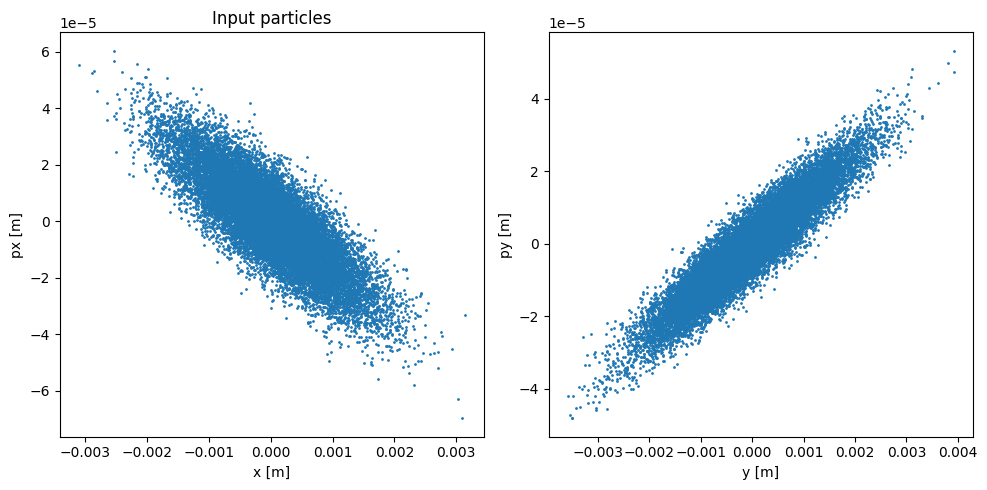

In [3]:
x_input = df_input['x']
y_input = df_input['y']
px_input = df_input['px']
py_input = df_input['py']

# Plot input particles (two subplots for x and y)
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].scatter(x_input, px_input, s=1)
ax[0].set_xlabel('x [m]')
ax[0].set_ylabel('px [m]')
ax[0].set_title('Input particles')
ax[1].scatter(y_input, py_input, s=1)
ax[1].set_xlabel('y [m]')
ax[1].set_ylabel('py [m]')
plt.tight_layout()
plt.show()

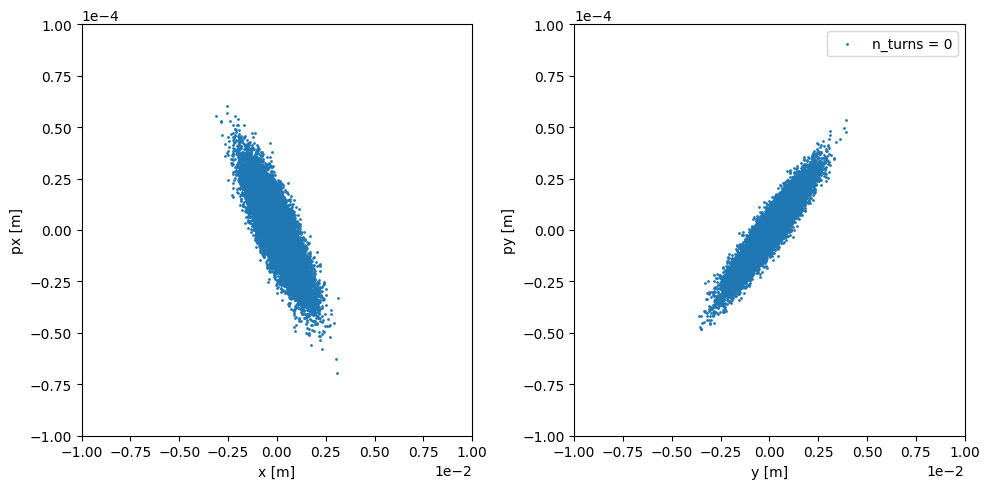

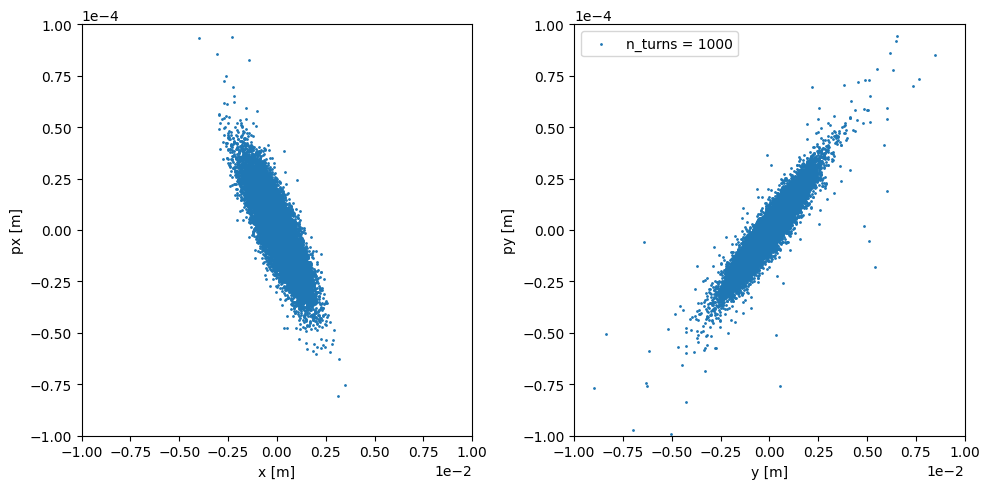

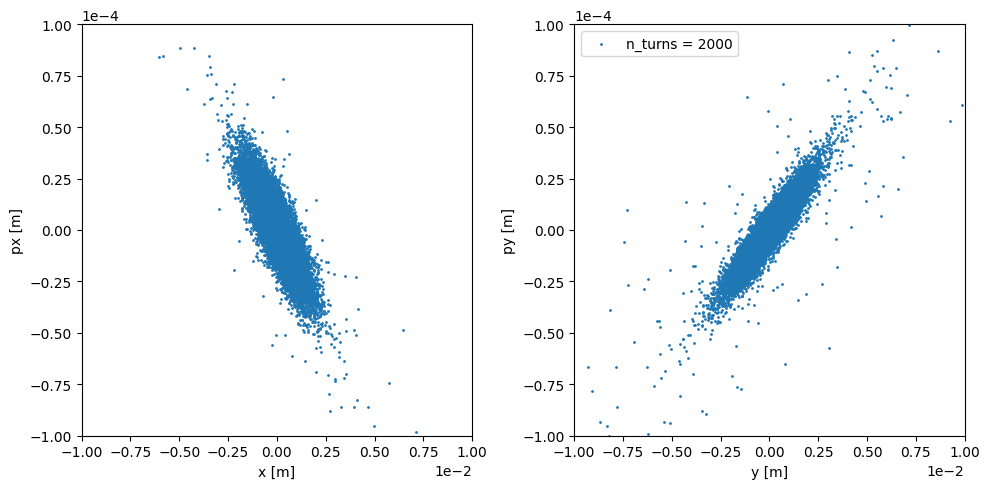

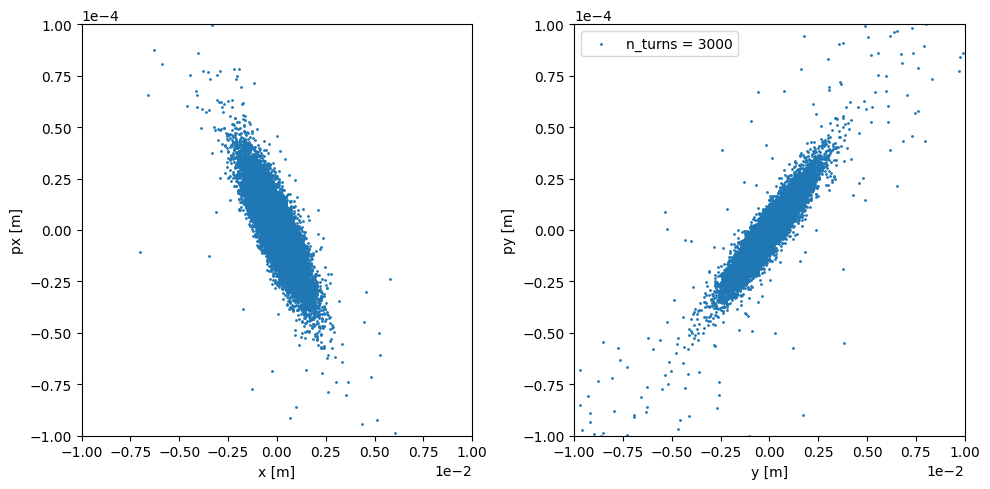

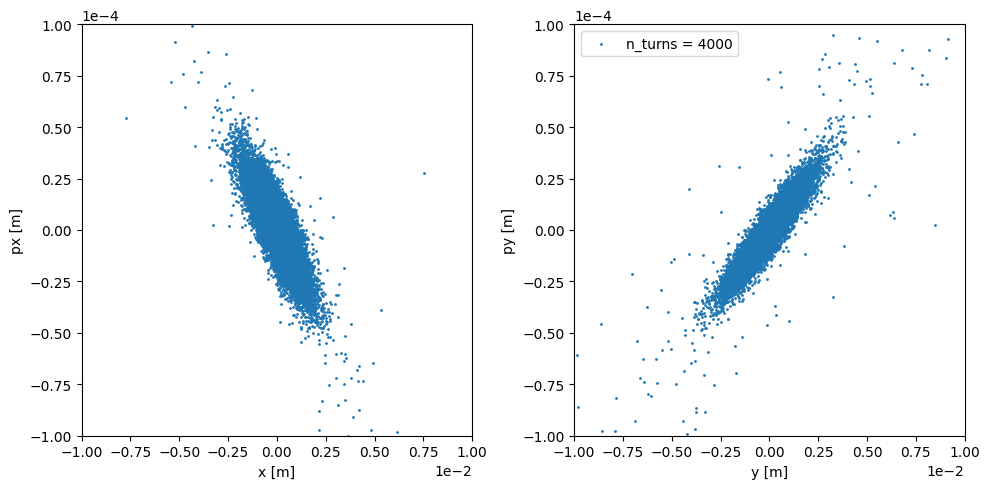

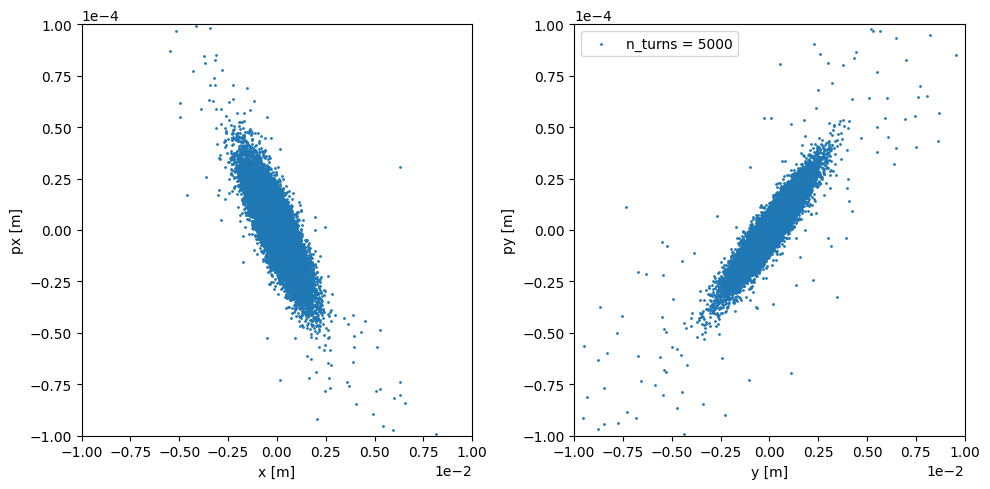

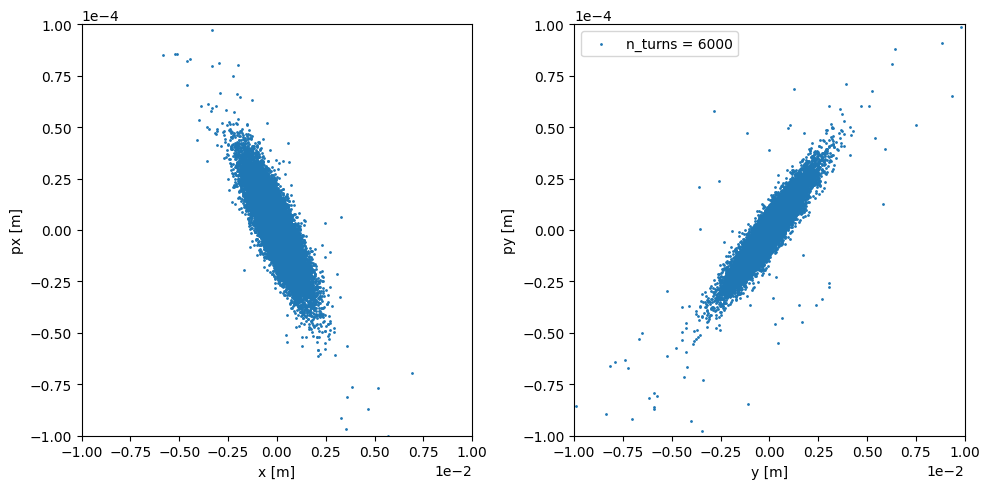

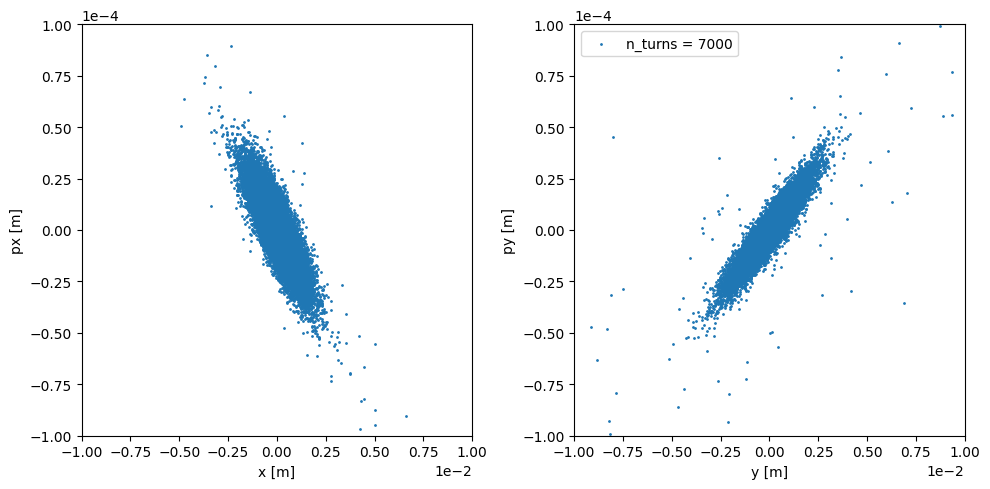

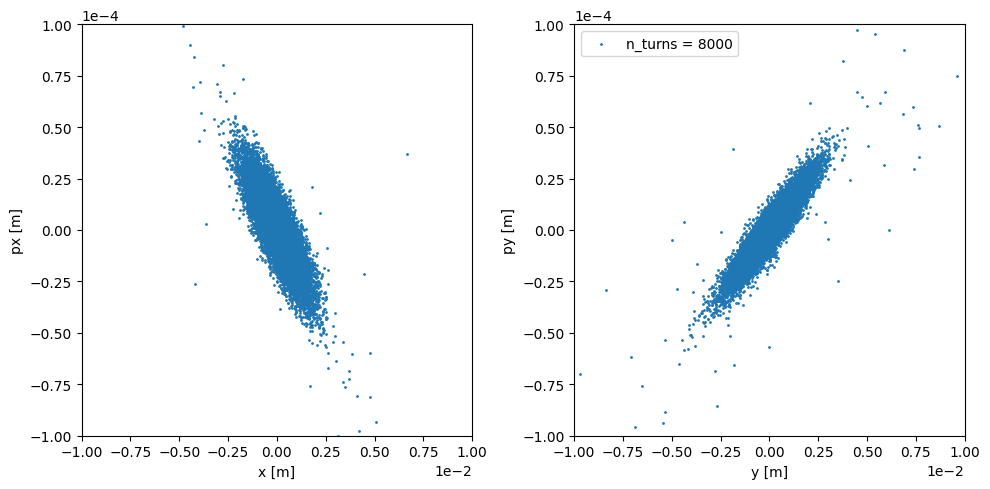

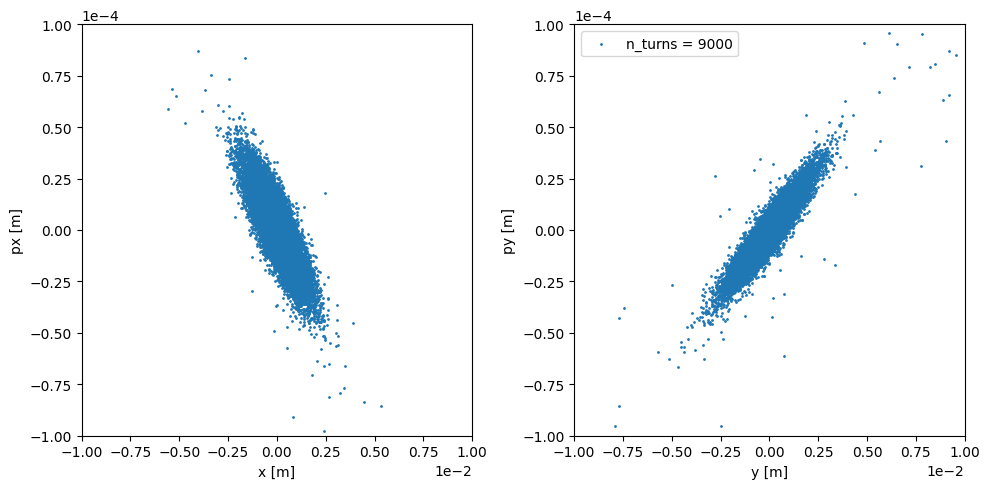

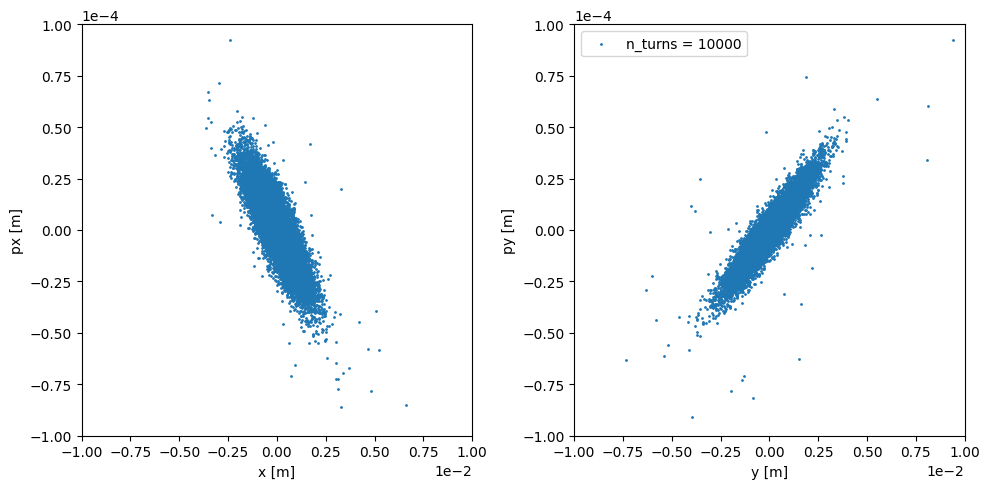

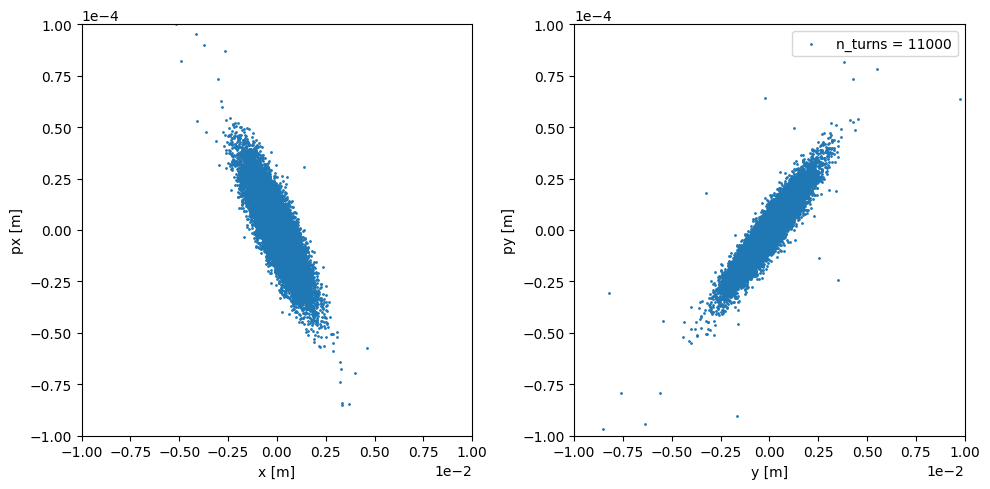

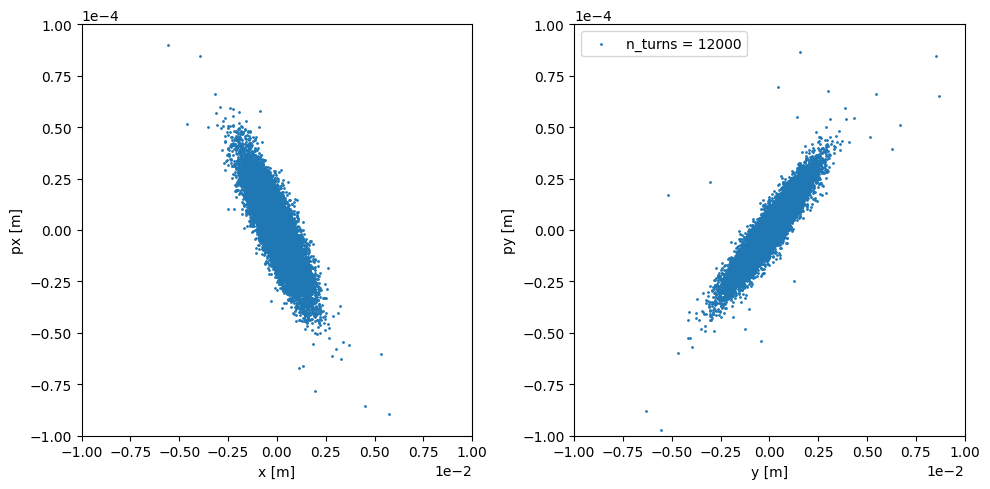

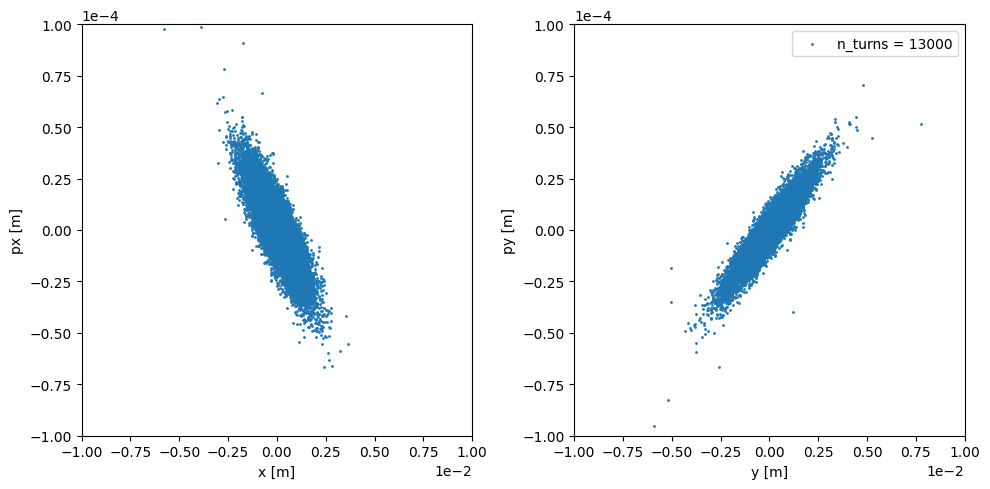

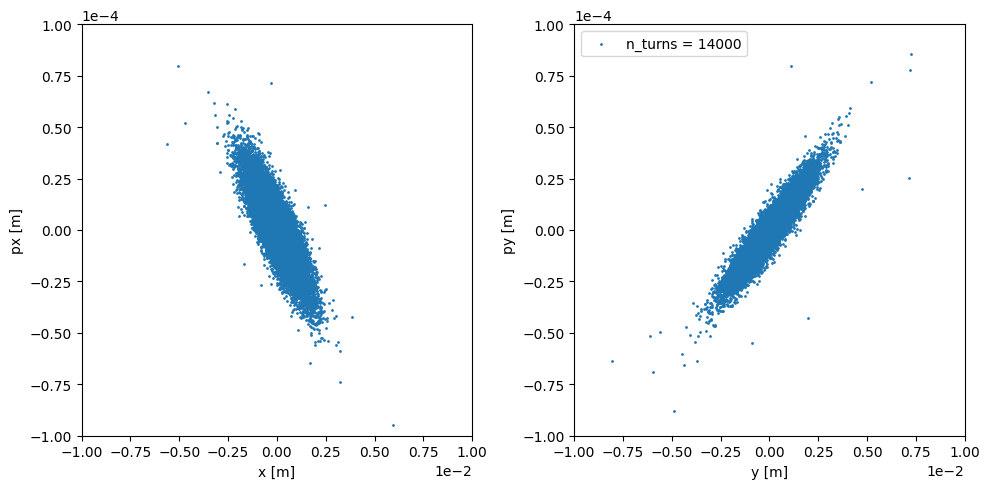

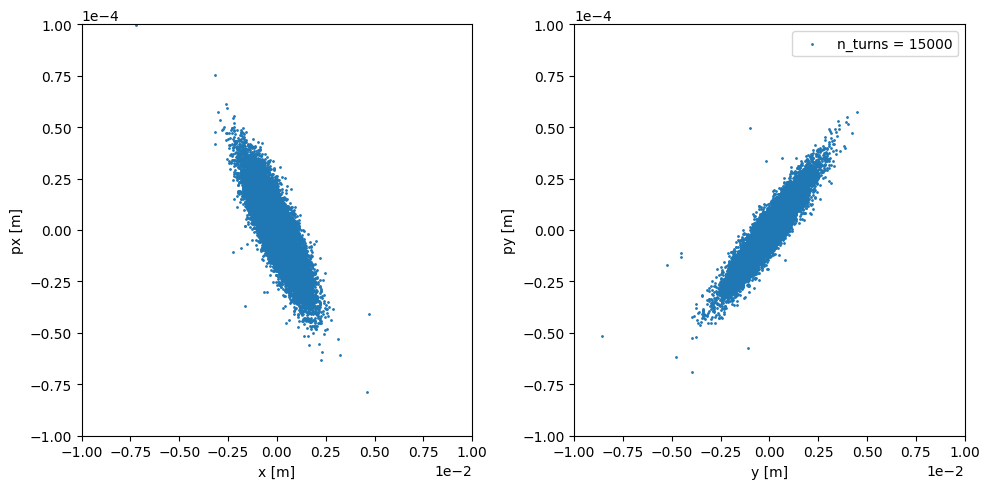

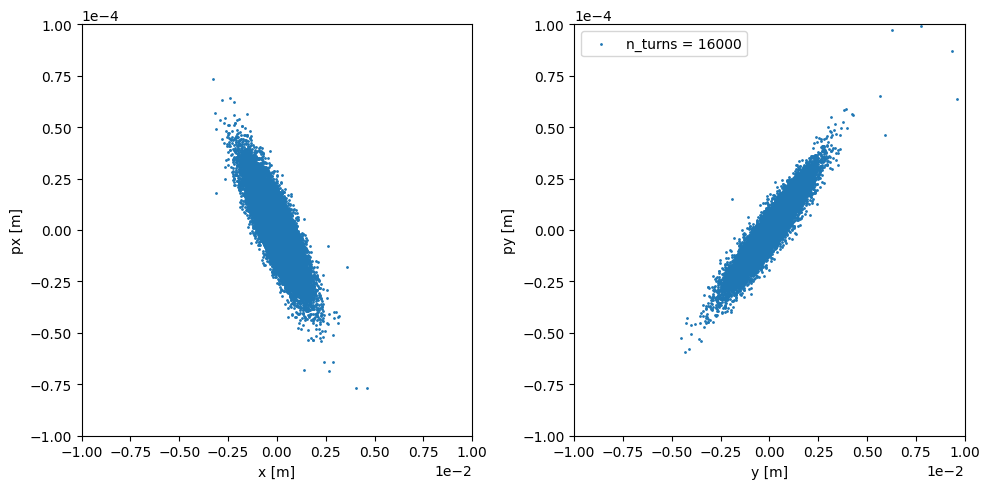

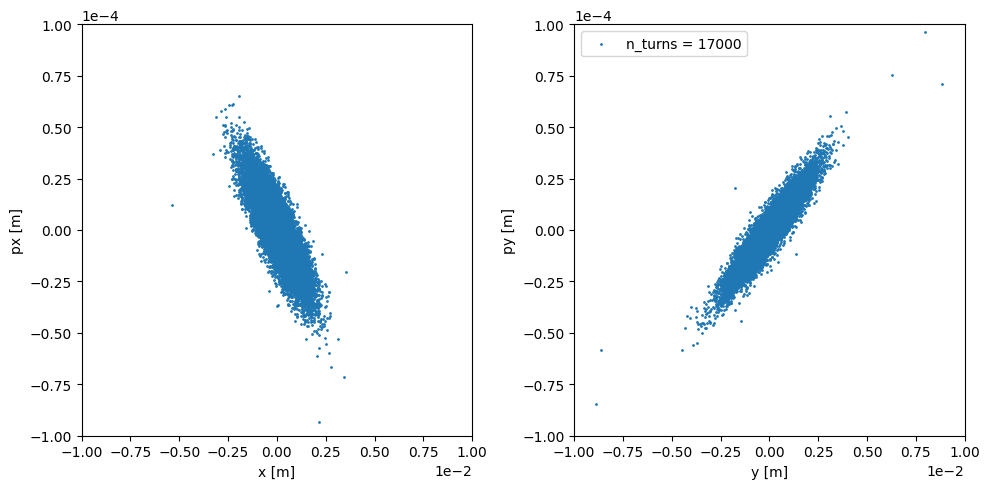

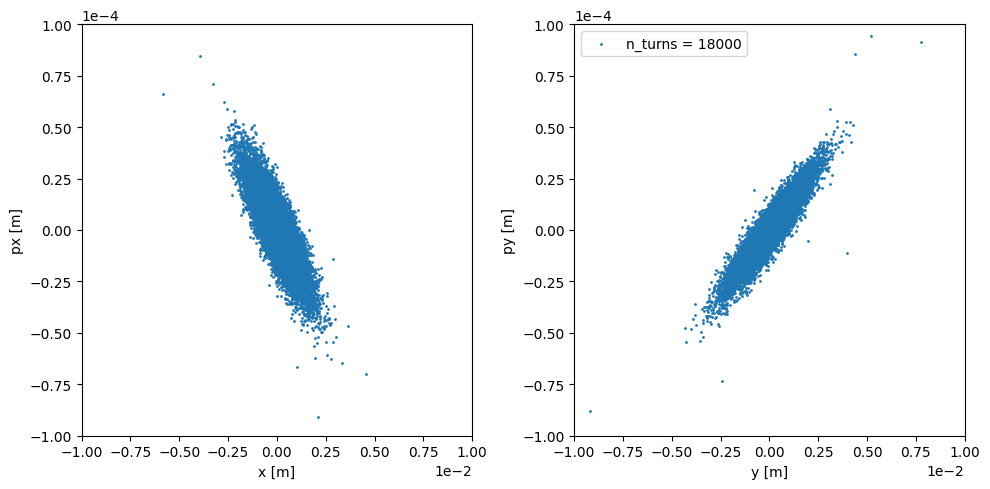

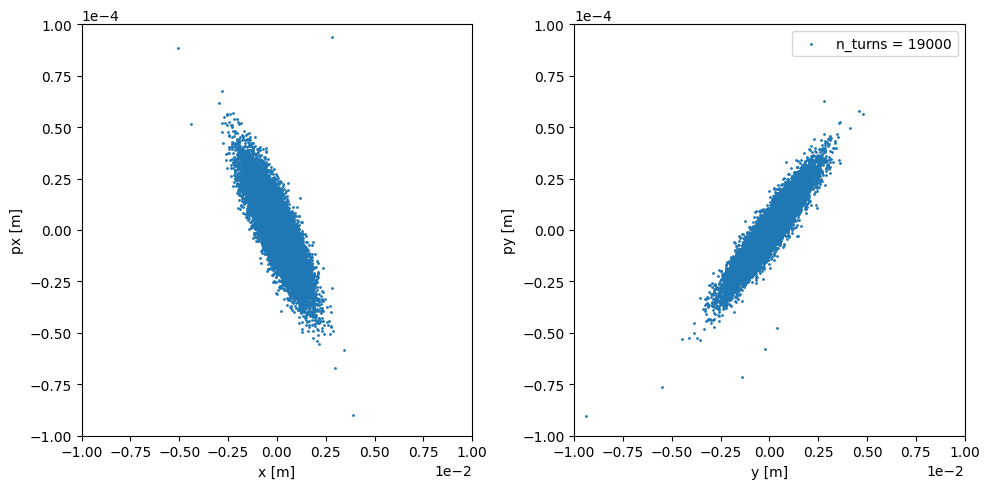

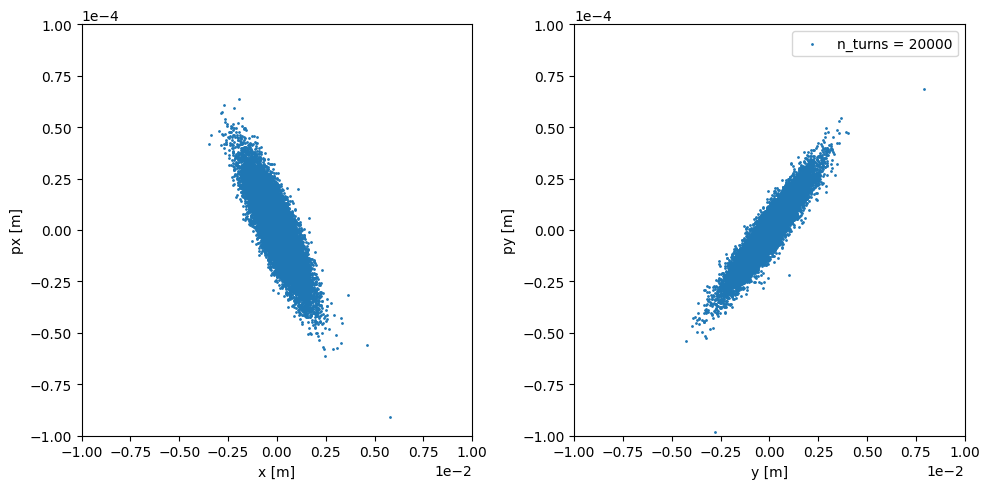

In [20]:
# Plot output particles (two subplots for x and y) at each turn from df
for index, row in df.iterrows():
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    # Plot x against px
    ax[0].scatter(row['particles_x'], row['particles_px'], label=f'n_turns = {row["n_turns"]}', s = 1)
    ax[0].set_xlabel('x [m]')
    ax[0].set_ylabel('px [m]')
    # Plot y against py
    ax[1].scatter(row['particles_y'], row['particles_py'], label=f'n_turns = {row["n_turns"]}', s = 1 )
    ax[1].set_xlabel('y [m]')
    ax[1].set_ylabel('py [m]')
    ax[0].set_xlim(-0.01, 0.01)
    ax[0].set_ylim(-0.0001, 0.0001)
    ax[1].set_xlim(-0.01, 0.01)
    ax[1].set_ylim(-0.0001, 0.0001)
    # Change ticks to scientific notation
    ax[0].ticklabel_format(axis='both', style='sci', scilimits=(0,0))
    ax[1].ticklabel_format(axis='both', style='sci', scilimits=(0,0))
    plt.tight_layout()
    plt.legend()
    plt.show()
    





20000
20000
20000
19955
19851
19732
19636
19554
19503
19464
19436
19414
19390
19373
19361
19353
19347
19338
19333
19327
19321
19318


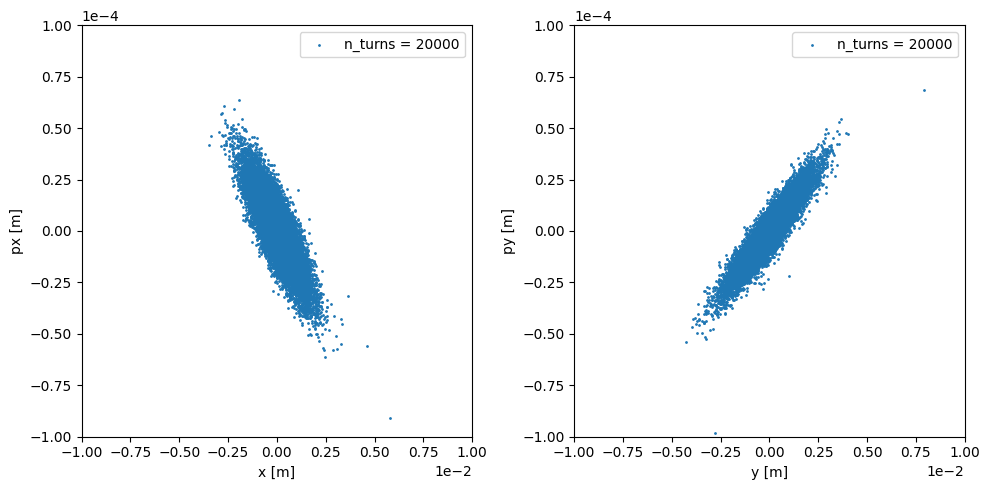

In [23]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Assume df is your DataFrame
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

def update(frame):
    ax[0].clear()
    ax[1].clear()
    
    row = df.iloc[frame]

    print(len(row['particles_x']))

    ax[0].scatter(row['particles_x'], row['particles_px'], label=f'n_turns = {row["n_turns"]}', s=1)
    ax[0].set_xlabel('x [m]')
    ax[0].set_ylabel('px [m]')

    ax[1].scatter(row['particles_y'], row['particles_py'], label=f'n_turns = {row["n_turns"]}', s=1)
    ax[1].set_xlabel('y [m]')
    ax[1].set_ylabel('py [m]')

    ax[0].set_xlim(-0.01, 0.01)
    ax[0].set_ylim(-0.0001, 0.0001)
    ax[1].set_xlim(-0.01, 0.01)
    ax[1].set_ylim(-0.0001, 0.0001)

    ax[0].ticklabel_format(axis='both', style='sci', scilimits=(0,0))
    ax[1].ticklabel_format(axis='both', style='sci', scilimits=(0,0))

    # Position legend at top right
    ax[0].legend( loc='upper right')
    ax[1].legend( loc='upper right')

    plt.tight_layout()

# Assuming you have df as your DataFrame
animation = FuncAnimation(fig, update, frames=len(df), interval=100, repeat=False)

# Save the animation as a GIF using PillowWriter
animation.save('animation.gif', writer='pillow', fps=1)

plt.show()


In [3]:
df

,ll_particles_x,ll_particles_px,ll_particles_y,ll_particles_py,emittance_x,emittance_y,octupoles,n_turns
0,"[0.0014759293830943893, 0.0014759293830943893,...","[-7.877326088869685e-06, -7.877326088869685e-0...","[0.0013069699047799817, 0.0013069699047799817,...","[2.113569460475705e-05, 2.113569460475705e-05,...",NaN,NaN,0.000000,1000
1,"[-0.0008195713505969434, -0.000819571350596943...","[-6.558675834765512e-06, -6.558675834765512e-0...","[-7.02264247668457e-05, -7.02264247668457e-05,...","[-8.179827074743051e-06, -8.179827074743051e-0...",NaN,NaN,1.777604,2000
2,"[1.1414773725683185, 1.1414773725683185, 0.548...","[0.0759043126751477, 0.0759043126751477, 0.025...","[0.5722691099528375, 0.5722691099528375, -1.13...","[0.026169759901498477, 0.026169759901498477, -...",NaN,NaN,47.333150,3000
3,"[1.1414773725683185, 1.1414773725683185, 0.548...","[0.0759043126751477, 0.0759043126751477, 0.025...","[0.5722691099528375, 0.5722691099528375, -1.13...","[0.026169759901498477, 0.026169759901498477, -...",NaN,NaN,46.443903,4000


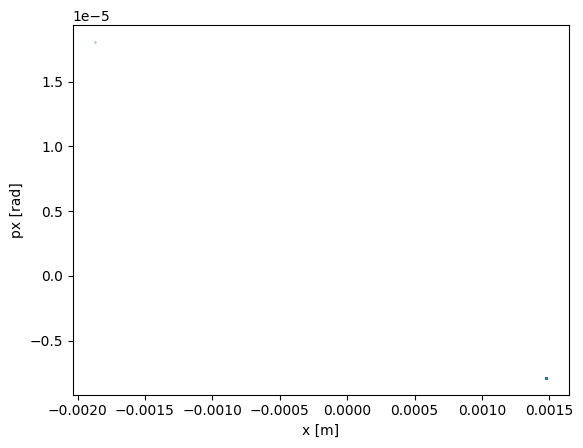

In [6]:
particles_x = df.iloc[0]['ll_particles_x']
particles_px = df.iloc[0]['ll_particles_px']
particles_y = df.iloc[0]['ll_particles_y']
particles_py = df.iloc[0]['ll_particles_py']

plt.scatter(particles_x, particles_px, s=0.1)
plt.xlabel('x [m]')
plt.ylabel('px [rad]')
plt.show()

In [7]:
particles_x

array([0.00147593, 0.00147593, 0.00147593, ..., 0.00147593, 0.00147593,
       0.00147593])

In [11]:
len(particles_px)

20000

In [9]:
particles_y

array([0.00130697, 0.00130697, 0.00130697, ..., 0.00130697, 0.00130697,
       0.00130697])

In [10]:
particles_py

array([2.11356946e-05, 2.11356946e-05, 2.11356946e-05, ...,
       2.11356946e-05, 2.11356946e-05, 2.11356946e-05])

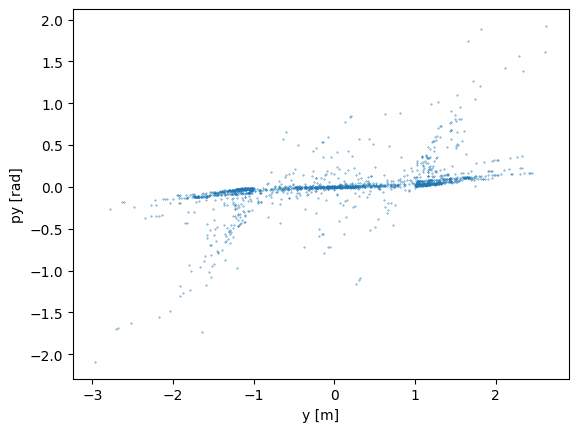

In [16]:
y = df.y
py = df.py

plt.scatter(y, py, s=0.1)
plt.xlabel('y [m]')
plt.ylabel('py [rad]')
plt.show()


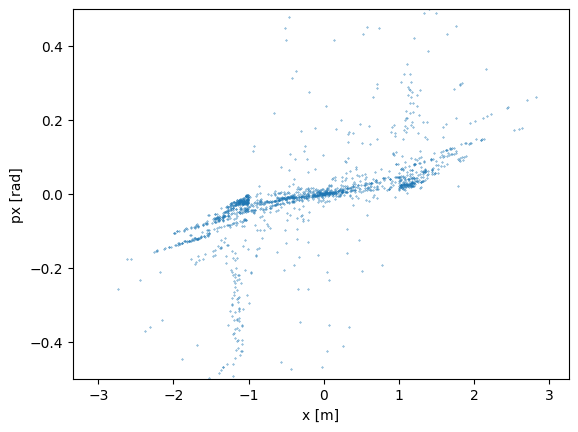

In [22]:
x = df.x
px = df.px

plt.scatter(x, px, s=0.1)
plt.xlabel('x [m]')
plt.ylabel('px [rad]')
plt.ylim(-0.5, 0.5)
plt.show()